# <center>WeRateDogs, Finds out which are most favored dog types.<center>



WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The account was started in 2015 by college student Matt Nelson, and has received international media attention for its popularity .
WeRateDogs asks people to send photos of their dogs, then tweets selected photos rating and a humorous comment. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10"
Check this twitter page for more [information](https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor)


<img src="img/we_rate_dog.png" height=200 width=400 >

In this project I have analzed the WerateDogs twitter archives to figure out the favorite dog types and their ratings. The original data was not enough for analysis so additional twitter crawling and image prediction results by neural network model were used. 



In [13]:
#Import required libraries
import requests
import pandas as pd
import numpy as np

import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

#reStore the clean DataFrame from a CSV file
df_twitter=pd.read_csv('twitter_archive_master.csv')


## Most rated dog type 
I have first observed the what are the top 15 dogs that rated most. Golden Retriever was the dog type that were most rated followed by Labrador retriever and Pembroke. 

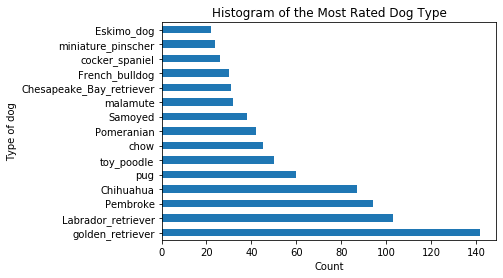

In [2]:
#Plot top 15 dogs who got appears most often
df_dog_type=df_twitter['dog_type'].value_counts()[0:15]
df_dog_type.plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [3]:
#df_twitter.loc[df_twitter.dog_type=="golden_retriever",'jpg_url']

<center>This is Golden_retriever!</center>
<img align="center" width="300" height="200" src="https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg">

## The dog type with highest rating & worst rating
After then I have checked which type of dog got the highest ratings. This was Bouvier_des_Flandres but it turned out that this is only once that the dog appeared in the dataset. I have also checked worst rated dog. This was Japanese_spaniel however, this also appered only one time in this dataset. So in the next step I have checked the ratings vs. number of ratings to see real popular dog with both measure.

In [4]:
#group by dog type and get average values 
df_dog_type_mean = df_twitter.groupby('dog_type').mean()
df_dog_type_mean.head()
#sort by high rating averages
df_dog_type_sorted = df_dog_type_mean['rating_numerator'].sort_values(ascending=False)
df_dog_type_sorted
df_twitter.loc[df_twitter.dog_type == 'Bouvier_des_Flandres', 'jpg_url']
#df_twitter['jpg_url'][1074]

113    https://pbs.twimg.com/ext_tw_video_thumb/86128...
Name: jpg_url, dtype: object

<center>This is Bouvier_des_Flandres! Top rated dog type!</center>
<img align="center" width="300" height="300" src="https://pbs.twimg.com/ext_tw_video_thumb/861288473281437696/pu/img/RERGmRgPyaaaB-tB.jpg">


In [5]:
df_twitter.loc[df_twitter.dog_type == 'Japanese_spaniel', 'jpg_url']

1214    https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg
Name: jpg_url, dtype: object

<center> This is Japanese_spaniel which got worst rating</center>
<img align="center" width="300" height="300" src="https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg">



## Dog type Ratings vs Rating Count 

While golden retriever got most number of ratings,it was not top rated dog type. 
So here I will check both counting and rating. 

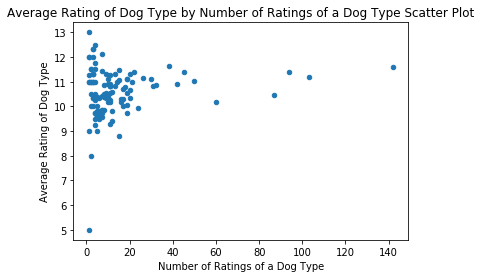

In [6]:

dog_type_count = df_twitter.groupby('dog_type')['rating_numerator'].count()
dog_type_mean = df_twitter.groupby('dog_type')['rating_numerator'].mean()
df_dog_type=pd.DataFrame()
df_dog_type['mean']=dog_type_mean 
df_dog_type['count']=dog_type_count

df_dog_type.plot(x='count', y='mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');

<left>**Golden Retriever lies on top right corner which represent it is favored dog type the by large number**</left>

<p align="left">
  <img width="400" height="200" align="left" src="https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg">
</p>

## Reteweet counts & Favorite counts vs Ratings. 
Here I checked the relationship for retweet counts vs. ratings and Favorite count vs Ratings. As expected, high reetweet counts and high Favorite counts got high ratings. 
See also which dog got the highest number of retweets and favorite counts. 

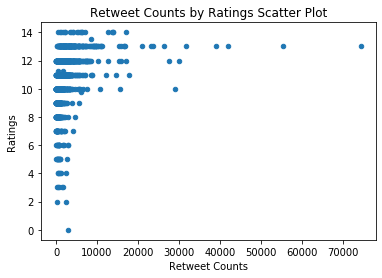

In [7]:
df_twitter.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

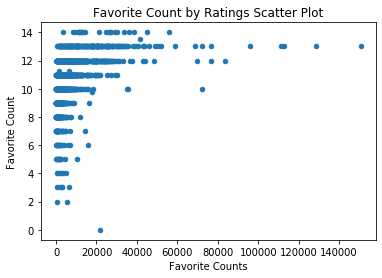

In [8]:
df_twitter.plot(x='favorite_count', y='rating_numerator', kind='scatter')
plt.xlabel('Favorite Counts')
plt.ylabel('Favorite Count')
plt.title('Favorite Count by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

In [9]:
print(df_twitter.dog_type[df_twitter.retweet_count.idxmax()])
df_twitter.jpg_url[df_twitter.retweet_count.idxmax()]

Labrador_retriever


'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

In [10]:
print(df_twitter.dog_type[df_twitter.favorite_count.idxmax()])
df_twitter.jpg_url[df_twitter.favorite_count.idxmax()]

Labrador_retriever


'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

<center>The most retweeted dog!</center>
<img src='https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg' height=300, width=300>


<center>The dog with most favorite count! Yes, This is the same dog above!</center>
<img src='https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg' height=300, width=300>

## Ratings by Dog Stages
While we didn't have enought labels for each dog stages , I was just curious when is the most loved/favored time for dogs. **Be aware that this is a biased result!** Here I have large samples for pupper and very low number for others. But let's just check for average ratings for each dog stages just for fun! It seems dog stage doesn't seems to be have impact on ratings. Sligtly low average on pupper would be just effec of samples of large number.

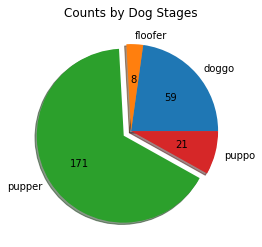

In [36]:
count_by_stage=[df_twitter['doggo'].value_counts()[1],
df_twitter['floofer'].value_counts()[1],
df_twitter['pupper'].value_counts()[1],
df_twitter['puppo'].value_counts()[1]]
explode = (0, 0, 0.1, 0) 
names=['doggo','floofer','pupper','puppo']
#plt.pie(count_by_stage,labels=names,autopct="",explode=explode)
p, tx, autotexts = plt.pie(count_by_stage, labels=names,explode=explode,autopct="", shadow=True)
for i, a in enumerate(autotexts):
    a.set_text("{}".format(count_by_stage[i]))
plt.title('Counts by Dog Stages');


In [34]:
ratings_by_stage=[df_twitter.groupby('doggo')['rating_numerator'].mean()[1],
df_twitter.groupby('floofer')['rating_numerator'].mean()[1],
df_twitter.groupby('pupper')['rating_numerator'].mean()[1],
df_twitter.groupby('puppo')['rating_numerator'].mean()[1]]
ratings_by_stage

[11.76271186440678, 11.875, 10.837836257309942, 12.0]

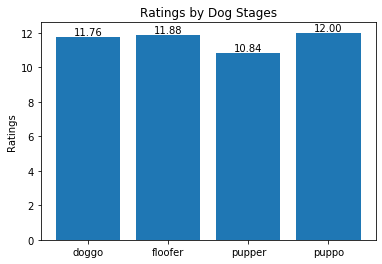

In [35]:
names=['doggo','floofer','pupper','puppo']
plt.bar(names,ratings_by_stage)
plt.title('Ratings by Dog Stages')
plt.ylabel('Ratings')
for x,y in zip(names,ratings_by_stage):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show();